In [22]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# data analysis

In [25]:
df.shape

(1338, 7)

In [26]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [27]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
df['age'][df['age'] == 0]

Series([], Name: age, dtype: int64)

In [30]:
df['bmi'][df['bmi'] == 0]

Series([], Name: bmi, dtype: float64)

In [31]:
df.duplicated().sum()

1

In [32]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [33]:
for i in ['sex', 'children', 'smoker', 'region']:
    print(sorted(df[i].unique()))

['female', 'male']
[0, 1, 2, 3, 4, 5]
['no', 'yes']
['northeast', 'northwest', 'southeast', 'southwest']


# Feature eng

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.duplicated().sum()

0

### one hot encoding

In [36]:
gender = pd.get_dummies(df['sex'], prefix='gender', drop_first=True)

In [38]:
gender.head()

,gender_male
0,0
1,1
2,1
3,1
4,1


In [40]:
df = pd.concat((df, gender), axis=1)

In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [42]:
region = pd.get_dummies(df['region'], prefix="region", drop_first=True)

In [43]:
region.head()

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [44]:
smoker = pd.get_dummies(df['smoker'], prefix='smoker', drop_first=True)

In [45]:
smoker.head()

,smoker_yes
0,1
1,0
2,0
3,0
4,0


In [46]:
df = pd.concat((df, smoker), axis=1)

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges,gender_male,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [48]:
df.drop(['sex', 'smoker'], axis=1, inplace=True)

In [49]:
df.head()

,age,bmi,children,region,charges,gender_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


### Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
labelenc = LabelEncoder()

In [53]:
df['region'] = labelenc.fit_transform(df['region'])

In [54]:
df.head()

,age,bmi,children,region,charges,gender_male,smoker_yes
0,19,27.900,0,3,16884.92400,0,1
1,18,33.770,1,2,1725.55230,1,0
2,28,33.000,3,2,4449.46200,1,0
3,33,22.705,0,1,21984.47061,1,0
4,32,28.880,0,1,3866.85520,1,0


In [55]:
df['region'].unique()

array([3, 2, 1, 0])

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='region', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>,
        <AxesSubplot:xlabel='gender_male', ylabel='age'>,
        <AxesSubplot:xlabel='smoker_yes', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='region', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>,
        <AxesSubplot:xlabel='gender_male', ylabel='bmi'>,
        <AxesSubplot:xlabel='smoker_yes', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='region', ylabel='children'>,
        <AxesSub

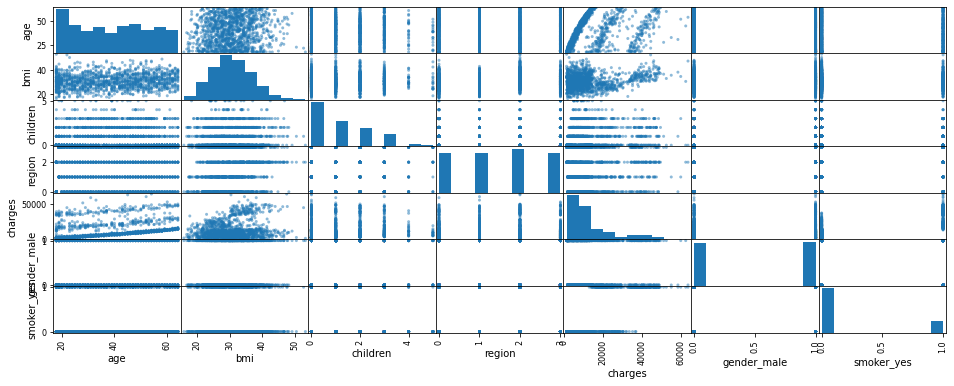

In [57]:
pd.plotting.scatter_matrix(df, figsize=(16, 6))

<AxesSubplot:>

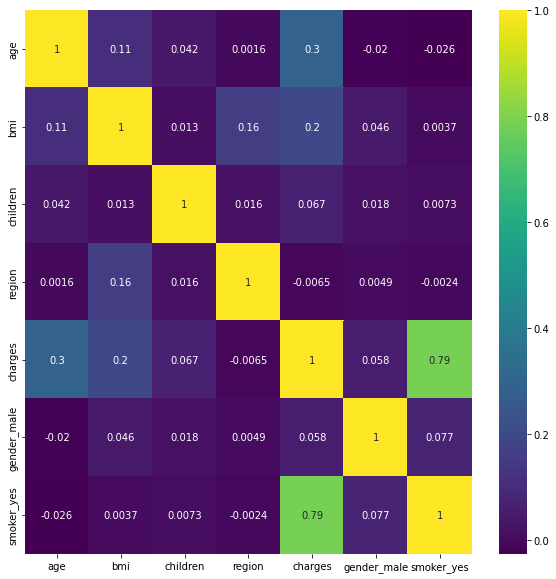

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap='viridis', cbar=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

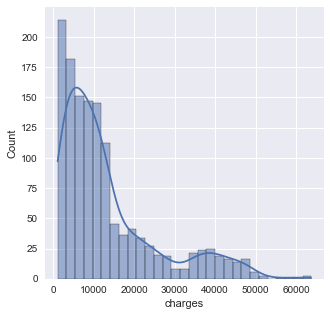

In [60]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x=df.charges, kde=True)

<AxesSubplot:>

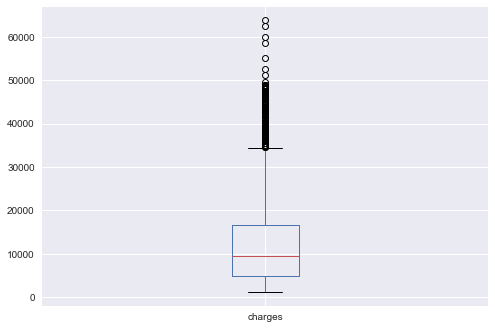

In [61]:
df['charges'].plot(kind='box')

<AxesSubplot:>

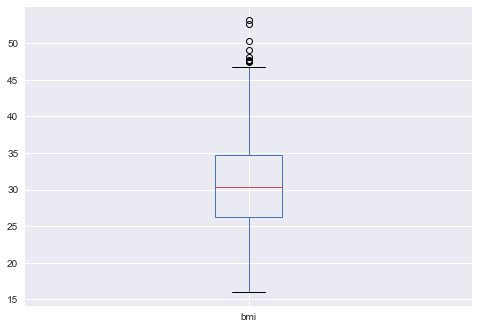

In [63]:
df['bmi'].plot(kind='box')

<AxesSubplot:>

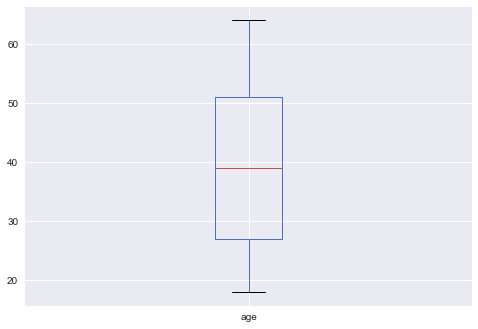

In [64]:
df['age'].plot(kind='box')

<AxesSubplot:xlabel='age', ylabel='Count'>

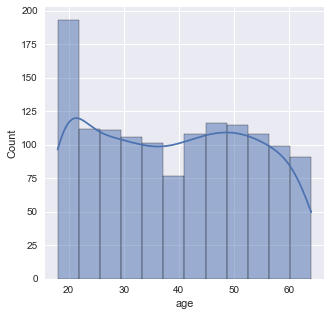

In [65]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x=df.age, kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

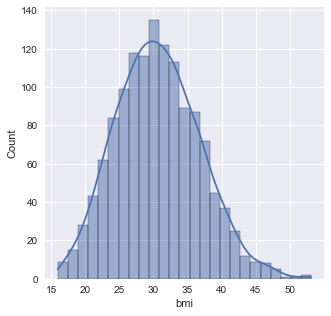

In [66]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x=df.bmi, kde=True)

In [69]:
df[df['charges'] == df['charges'].max()]

,age,bmi,children,region,charges,gender_male,smoker_yes
543,54,47.41,0,2,63770.42801,0,1


In [80]:
df.groupby('charges').agg('max')

,age,bmi,children,region,gender_male,smoker_yes
charges,,,,,,
1121.87390,18,23.210,0,2,1,0
1131.50660,18,30.140,0,2,1,0
1135.94070,18,33.330,0,2,1,0
1136.39940,18,33.660,0,2,1,0
1137.01100,18,34.100,0,2,1,0
...,...,...,...,...,...,...
55135.40209,33,35.530,0,1,0,1
58571.07448,31,38.095,1,0,0,1
60021.39897,52,34.485,3,1,1,1


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [82]:
X = df.drop('charges', axis=1)
y = df.charges

In [83]:
X.head()

,age,bmi,children,region,gender_male,smoker_yes
0,19,27.900,0,3,0,1
1,18,33.770,1,2,1,0
2,28,33.000,3,2,1,0
3,33,22.705,0,1,1,0
4,32,28.880,0,1,1,0


In [84]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=322)

In [86]:
linear_model = LinearRegression()

In [87]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [88]:
linear_model.score(x_train, y_train)

0.7605684916281634

In [89]:
predict = linear_model.predict(x_test)

<AxesSubplot:xlabel='charges', ylabel='Count'>

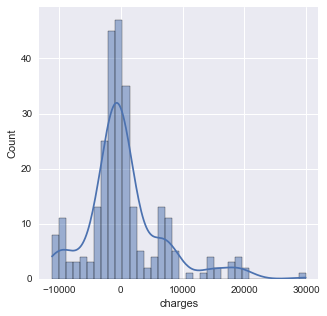

In [92]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x=y_test-predict, kde=True)

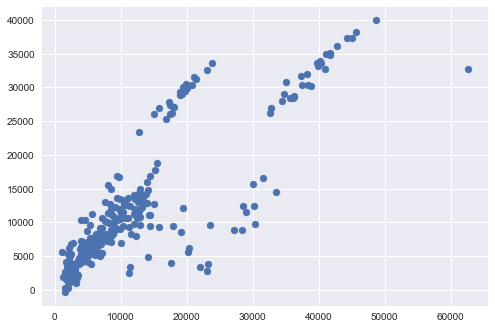

In [93]:
plt.scatter(y_test, predict)

In [94]:
file = open('linear_model', 'wb')
pickle.dump(linear_model, file)